<a href="https://colab.research.google.com/github/hyj765/AI-study/blob/main/Document_Classicfication/naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
from urllib import request
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
table=pd.read_csv('spam.csv',encoding='latin-1')

In [11]:
table

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [15]:
table1=table.dropna(axis=1)

In [16]:
print(table1.shape)
print(table.shape)

(5572, 2)
(5572, 5)


In [17]:
table1

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [19]:
from sklearn.model_selection import train_test_split

In [22]:
print(table1['v1'].keys)

<bound method Series.keys of 0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: v1, Length: 5572, dtype: object>


In [24]:
def d_t(table):
  print(table['v1'].keys)

In [25]:
d_t(table1)

<bound method Series.keys of 0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: v1, Length: 5572, dtype: object>


In [48]:
print(set(table1['v1']))

{'ham', 'spam'}


In [60]:
def key_extraction(table):
  data=set(table['v1'])
  label = {}
  for i,d in enumerate(data):
    label[d] = i
  return label

In [61]:
label=key_extraction(table1)

In [62]:
print(label)

{'ham': 0, 'spam': 1}


In [65]:
def data_labeling(labeling,df):
  return label[df['v1']]

In [67]:
table1['label'] = table1.apply(lambda x : data_labeling(label,x),axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
table1

,v1,v2,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


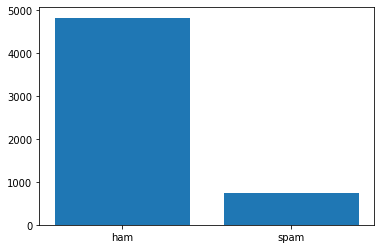

In [77]:
x = [0,1]
plt.bar(x,table1.v1.value_counts().array)
plt.xticks(x,['ham','spam']);

In [78]:
from sklearn.naive_bayes import MultinomialNB

In [99]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [95]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [93]:
import re
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords


In [96]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [97]:
process_data = []

for i in range(0,len(table1)):
  text = re.sub('[^a-zA-Z]',' ', table1['v2'][i])
  text = text.lower()
  text = text.split()
  ps = PorterStemmer()
  text = [ps.stem(word) for word in text if word not in set(stopwords.words('english'))]
  text = ' '.join(text)
  process_data.append(text)

In [118]:
encorder = CountVectorizer()
x = encorder.fit_transform(process_data).toarray()
y = table1['label'].values

In [115]:
table1

,v1,v2,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [119]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [121]:
from sklearn.metrics import accuracy_score

In [122]:
model = MultinomialNB()
model.fit(x_train,y_train)
predict = model.predict(x_test)
accuracy = accuracy_score(predict,y_test)
print(accuracy)

0.979066985645933
